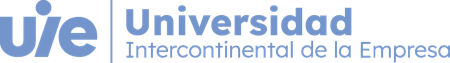

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# Modelo de clasificación

In [1]:
# Impotación de librerías
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.model_selection

# Carga de datos

In [2]:
DATA_FILE = 'proy_supermercado_dev_preprocesado_base.csv'
MODEL_FILE = 'modelo_clasificacion.pkl'
TEST_SPLIT = .3

In [3]:
df = pd.read_csv(DATA_FILE)
display(df)

,educacion,ingresos,hijos_casa,adolescentes_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,...,intensidad_compra,campanas_totales,estado_civil_Alone,estado_civil_Desconocido,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,estado_civil_Together,estado_civil_Widow,estado_civil_YOLO
0,3.0,53359.0,1.0,1.0,4.0,173.0,4.0,30.0,3.0,6.0,...,2.000000,0,0,0,0,1,0,0,0,0
1,3.0,21474.0,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,...,6.000000,1,0,0,0,0,1,0,0,0
2,3.0,41411.0,0.0,0.0,11.0,37.0,32.0,38.0,11.0,3.0,...,0.583333,0,0,0,1,0,0,0,0,0
3,5.0,64504.0,1.0,2.0,81.0,986.0,36.0,168.0,16.0,0.0,...,0.219512,0,0,0,0,0,0,1,0,0
4,3.0,65169.0,0.0,0.0,23.0,1074.0,0.0,69.0,0.0,0.0,...,1.125000,4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,3.0,19419.0,1.0,0.0,76.0,2.0,14.0,28.0,16.0,3.0,...,0.090909,0,0,0,0,1,0,0,0,0
1813,3.0,43602.0,1.0,1.0,45.0,19.0,5.0,12.0,10.0,3.0,...,0.130435,0,0,0,0,0,1,0,0,0
1814,3.0,24639.0,1.0,1.0,3.0,20.0,3.0,16.0,0.0,4.0,...,1.500000,0,0,0,0,1,0,0,0,0
1815,3.0,90000.0,0.0,0.0,91.0,675.0,144.0,133.0,94.0,192.0,...,0.184783,3,0,0,0,1,0,0,0,0


# Partición de los datos

In [4]:
# Definimos la variable objetivo
target_col = "respuesta"
feature_cols = [col for col in df.columns if col != target_col]

In [5]:
# Construimos X e y
X = df[feature_cols].copy()
y = df[target_col]

# División train-test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=TEST_SPLIT, random_state=42, stratify=y
)

In [6]:
import pandas as pd

print(f"ANTES del Undersampling Manual:")
print(f"  Train - Clase 0: {(y_train == 0).sum()}")
print(f"  Train - Clase 1: {(y_train == 1).sum()}")

# Unimos X e y temporalmente para poder filtrar las filas de forma sencilla
df_train = pd.concat([X_train, y_train], axis=1)

# Separamos nuestro dataset en dos grupos según la clase objetivo
clase_0 = df_train[df_train['respuesta'] == 0] 
clase_1 = df_train[df_train['respuesta'] == 1]

# Definimos cuántas muestras queremos conservar de la clase mayoritaria
# En este caso optamos por un Ratio 2:1 (el doble de ceros que de unos)
n_samples_0 = len(clase_1) * 5

# Realizamos el muestreo aleatorio sobre la clase 0 para reducir su tamaño
clase_0_under = clase_0.sample(n_samples_0, random_state=42)

# Concatenamos de nuevo la clase 1 original completa con nuestra clase 0 reducida
df_train_balanced = pd.concat([clase_0_under, clase_1])

# Volvemos a separar las variables predictoras (X) de la variable objetivo (y)
X_train = df_train_balanced.drop('respuesta', axis=1)
y_train = df_train_balanced['respuesta']

print(f"\nDESPUÉS del Undersampling Manual (Ratio 5:1):")
print(f"  Train - Clase 0: {(y_train == 0).sum()}")
print(f"  Train - Clase 1: {(y_train == 1).sum()}")
print(f"  Nuevo total: {len(y_train)}")


ANTES del Undersampling Manual:
  Train - Clase 0: 1082
  Train - Clase 1: 189

DESPUÉS del Undersampling Manual (Ratio 5:1):
  Train - Clase 0: 945
  Train - Clase 1: 189
  Nuevo total: 1134


# Modelos de Aprendizaje Automático Clasificación

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


modelos_clasificacion = [
    ("Regresión Logística", LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)),
    ("Árbol de Decisión", DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ("SVC", SVC(probability=True, random_state=42))
]

In [8]:
hiperparametros_clasificacion = {
    
    "Regresión Logística": {
        "model__C": [0.01, 0.1, 1, 10, 100],
        "model__penalty": ['l2'],  
        "model__solver": ['liblinear', 'lbfgs'],  
        "model__max_iter": [1000]  
    },
    
    "Árbol de Decisión": {
        "model__max_depth": [5, 10, 15, None], 
        "model__min_samples_split": [2, 10, 20],  
        "model__min_samples_leaf": [1, 5, 10],  
        "model__criterion": ['gini', 'entropy']  
    },
    

    "SVC": {
        "model__C": [0.1, 1, 10, 100],
        "model__kernel": ['rbf', 'linear'],  
        "model__gamma": ['scale', 'auto']  
    },

    
}


In [9]:
# Evaluamos cada modelo
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score

scores_clasificacion = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "F1": make_scorer(f1_score),
}

# Búsqueda del mejor modelo con hiperparámetros

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
best_model = None
best_score = 0

for model_name, model in modelos_clasificacion:
    print(f"Evaluando modelo: {model_name}")
    param_grid = hiperparametros_clasificacion[model_name]

    # Pipeline (tal como lo tienes tú)
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),  # Escalado automático por fold
        ("model", model)
    ])
    # GridSearchCV
    grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scores_clasificacion,
    refit="F1",  # Optimizamos según F1
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  
    n_jobs=-1,
    verbose=1
)

    # Entrenamiento del GridSearch
    grid_search.fit(X_train, y_train)

    # Resultados del modelo actual
    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"Mejor Precision de validación cruzada para {model_name}: {grid_search.best_score_}")

    # Guardamos el mejor modelo global
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_







Evaluando modelo: Regresión Logística
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros para Regresión Logística: {'model__C': 10, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Mejor Precision de validación cruzada para Regresión Logística: 0.5757796738688234
Evaluando modelo: Árbol de Decisión
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros para Árbol de Decisión: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}
Mejor Precision de validación cruzada para Árbol de Decisión: 0.4370973599823344
Evaluando modelo: SVC
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros para SVC: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Mejor Precision de validación cruzada para SVC: 0.5752492307497856


Mejor modelo global: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000, random_state=42))])
Mejor Precision de validación cruzada global: 0.5757796738688234

Mejor accuracy en test del mejor modelo: 0.8388278388278388
Mejor AUC-ROC en test del mejor modelo: 0.8289127837514935 
              precision    recall  f1-score   support

         0.0      0.963     0.843     0.899       465
         1.0      0.475     0.815     0.600        81

    accuracy                          0.839       546
   macro avg      0.719     0.829     0.750       546
weighted avg      0.891     0.839     0.855       546

Matriz de confusión mostrada.


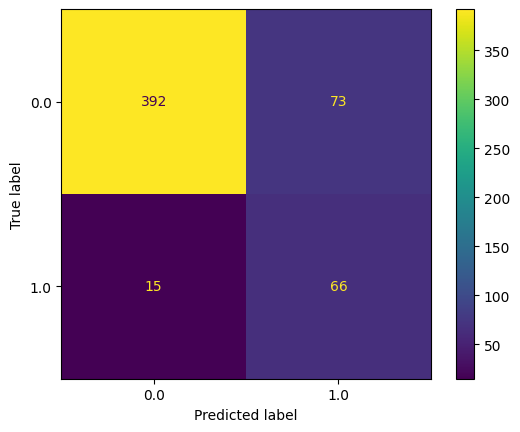

In [13]:
print(f"Mejor modelo global: {best_model}")
print(f"Mejor Precision de validación cruzada global: {best_score}\n")
print(f"Mejor accuracy en test del mejor modelo: {accuracy_score(y_test, best_model.predict(X_test))}")
print(f"Mejor AUC-ROC en test del mejor modelo: {roc_auc_score(y_test, best_model.predict(X_test))} ")
# Hacer bucle para mirar todas las métricas
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))
# También mostramos la matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
print("Matriz de confusión mostrada.")


Umbral Óptimo Seleccionado: 0.50
F1-Score con Umbral Óptimo: 0.6000

Reporte de Clasificación (Optimizado):
              precision    recall  f1-score   support

         0.0      0.963     0.843     0.899       465
         1.0      0.475     0.815     0.600        81

    accuracy                          0.839       546
   macro avg      0.719     0.829     0.750       546
weighted avg      0.891     0.839     0.855       546

AUC-ROC: 0.8859


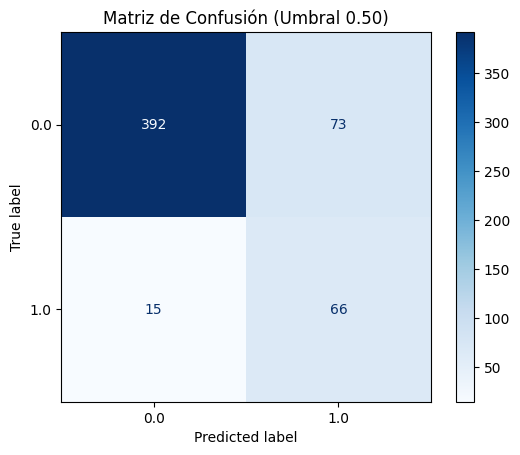

In [ ]:
if best_model is not None:
    # Obtenemos las probabilidades de la clase 1
    y_probs = best_model.predict_proba(X_test)[:, 1]
    
    # Definimos los umbrales a probar (de 0.01 a 0.99)
    thresholds = np.arange(0.0, 1.01, 0.01)
    
    # Variables para rastrear el mejor umbral
    best_threshold = 0.5
    max_f1 = 0.0
    
    # Bucle para encontrar el umbral con mejor F1
    for thresh in thresholds:
        # Convertir proba a predicción (0 o 1) usando el umbral actual
        y_pred_temp = (y_probs >= thresh).astype(int)
        
        # Calcular métrica (F1)
        current_f1 = f1_score(y_test, y_pred_temp)
        
        # Si es mejor que el anterior, lo guardamos
        if current_f1 > max_f1:
            max_f1 = current_f1
            best_threshold = thresh

    print(f"\nUmbral Óptimo Seleccionado: {best_threshold:.2f}")
    print(f"F1-Score con Umbral Óptimo: {max_f1:.4f}")

    # Aplicamos el mejor umbral encontrado a las predicciones finales
    y_pred_final = (y_probs >= best_threshold).astype(int)

    print("\nReporte de Clasificación (Optimizado):")
    print(classification_report(y_test, y_pred_final, digits=3))
    
    print(f"AUC-ROC: {roc_auc_score(y_test, y_probs):.4f}")

    # Matriz de Confusión
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap='Blues')
    plt.title(f"Matriz de Confusión (Umbral {best_threshold:.2f})")
    plt.show()

In [ ]:
# Evaluamos el sobreajuste del mejor model
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print(f"F1 entrenamiento: {f1_score(y_train, y_train_pred):.4f}")
print(f"F1 test: {f1_score(y_test, y_pred):.4f}")
print(f"Diferencia F1: {abs(f1_score(y_train, y_train_pred) - f1_score(y_test, y_pred)):.4f}")

F1 entrenamiento: 0.6089
F1 test: 0.6000
Diferencia F1: 0.0089


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

# ========== EVALUACIÓN DEL MEJOR MODELO GLOBAL ==========
print("\n" + "="*60)
print("MEJOR MODELO GLOBAL")
print("="*60)
print(f"Modelo: {best_model}")
print(f"Mejor F1 Score (CV): {best_score:.4f}")

# ========== PREDICCIONES ==========
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ========== MÉTRICAS RESUMIDAS ==========
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Diferencia Accuracy (sobreajuste): {abs(accuracy_train - accuracy_test):.3f}")

print(f"\nTrain F1 Score: {f1_train:.3f}")
print(f"Test F1 Score: {f1_test:.3f}")
print(f"Diferencia F1 (sobreajuste): {abs(f1_train - f1_test):.3f}")




MEJOR MODELO GLOBAL
Modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000, random_state=42))])
Mejor F1 Score (CV): 0.5758

Train Accuracy: 0.821
Test Accuracy: 0.839
Diferencia Accuracy (sobreajuste): 0.018

Train F1 Score: 0.609
Test F1 Score: 0.600
Diferencia F1 (sobreajuste): 0.009


In [ ]:
from pickle import dump

with open(MODEL_FILE, 'wb') as f:
    dump(best_model, f)